## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Import Lybraries

In [ ]:
!pip install livelossplot

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import math
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
from torch.optim import lr_scheduler
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from tqdm.notebook import tqdm
#from livelossplot import PlotLosses
import seaborn
# import smogn
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

## Data Processing

In [ ]:
#@title Load data Normal
def load_data(data_dir, data_type = 'fft_data', time_interval = 10):
  X = []
  y = []

  data_dir = os.path.join(data_dir, data_type)
  for sub_data in sorted(os.listdir(data_dir)):
    print(sub_data)
    path = os.path.join(data_dir, sub_data)
    #print(path)
    df = pd.read_pickle(path)
    idx = [i for i in range(0,df.shape[0],time_interval)]

    data = df.iloc[idx, :].fillna(0)
    data = data.to_numpy()

    X.append(data[:, :-1])
    #print(len(X[0]))
    y.append(data[:, -1].reshape(-1,1))
    #print(X.shape, y.shape)
    # else:
    #   max_ts = X.shape[1]
    #   X = np.vstack((X, data[:, :max_ts]))
    #   y = np.vstack((y, data[:, -1].reshape(-1,1)))
    #   #print(X.shape, y.shape)

  max_ts = max([i.shape[1] for i in X])
  print('Max time steps: ', max_ts)

  X_padded = []

  for sample in X:
    sample_padded = np.zeros((sample.shape[0], max_ts))
    #print(sample_padded[:, :sample.shape[1]].shape, sample.shape)
    sample_padded[:, :sample.shape[1]] = sample
    #print(sample_padded.shape)
    X_padded.append(sample_padded)

  X_padded = np.vstack((i for i in X_padded))
  y = np.vstack((i for i in y))

  print(X_padded.shape, y.shape)

    
  X, y = shuffle(X_padded, y, random_state=0)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)
    
  X_train = torch.from_numpy(X_train)
  y_train = torch.from_numpy(y_train)

  X_test = torch.tensor(X_test)
  y_test = torch.tensor(y_test)

  return X_train, y_train, X_test, y_test




data_dir = '/gdrive/MyDrive/stable videos/ISI/df/normal_light/with_color_mag/'
data_type = 'fft_data'
time_interval = 5

X_train, y_train, X_test, y_test = load_data(data_dir, data_type, time_interval)

print(X_train.size(), y_train.size(), X_test.size(), y_test.size())


Max time steps:  36
(7143, 36) (7143, 1)
torch.Size([5714, 36]) torch.Size([5714, 1]) torch.Size([1429, 36]) torch.Size([1429, 1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [ ]:
#@title Load Data KFold

def load_data(data_dir, data_type = 'fft_data', time_interval = 10):
  X = []
  y = []

  data_dir = os.path.join(data_dir, data_type)
  for sub_data in sorted(os.listdir(data_dir))[:-5]:
    print(sub_data)
    path = os.path.join(data_dir, sub_data)
    #print(path)
    df = pd.read_pickle(path)
    idx = [i for i in range(0,df.shape[0],time_interval)]

    data = df.iloc[idx, :].fillna(0)
    data = data.to_numpy()

    X.append(data[:, :-1])
    #print(len(X[0]))
    y.append(data[:, -1].reshape(-1,1))
    #print(X.shape, y.shape)
    # else:
    #   max_ts = X.shape[1]
    #   X = np.vstack((X, data[:, :max_ts]))
    #   y = np.vstack((y, data[:, -1].reshape(-1,1)))
    #   #print(X.shape, y.shape)

  max_ts = max([i.shape[1] for i in X])
  print('Max time steps: ', max_ts)

  X_padded = []

  for sample in X:
    sample_padded = np.zeros((sample.shape[0], max_ts))
    #print(sample_padded[:, :sample.shape[1]].shape, sample.shape)
    sample_padded[:, :sample.shape[1]] = sample
    #print(sample_padded.shape)
    X_padded.append(sample_padded)

  X_padded = np.vstack((i for i in X_padded))
  y = np.vstack((i for i in y))

  print(X_padded.shape, y.shape)

    
  X, y = shuffle(X_padded, y, random_state=0)

  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)
    
  X_train = torch.from_numpy(X)
  y_train = torch.from_numpy(y)

  # X_test = torch.tensor(X_test)
  # y_test = torch.tensor(y_test)

  return X_train, y_train


#test 59,60,61,62,6

data_dir = '/gdrive/MyDrive/stable videos/ISI/df/normal_light/with_color_mag/'
data_type = 'norm_data'
time_interval = 5

X_train, y_train = load_data(data_dir, data_type, time_interval)

print(X_train.size(), y_train.size())

sub_12_norm_data.pkl
sub_14_norm_data.pkl
sub_15_norm_data.pkl
sub_16_norm_data.pkl
sub_20_norm_data.pkl
sub_21_norm_data.pkl
sub_22_norm_data.pkl
sub_23_norm_data.pkl
sub_24_norm_data.pkl
sub_25_norm_data.pkl
sub_26_norm_data.pkl
sub_27_norm_data.pkl
sub_28_norm_data.pkl
sub_29_norm_data.pkl
sub_30_norm_data.pkl
sub_31_norm_data.pkl
sub_32_norm_data.pkl
sub_33_norm_data.pkl
sub_34_norm_data.pkl
sub_35_norm_data.pkl
sub_36_norm_data.pkl
sub_37_norm_data.pkl
sub_38_norm_data.pkl
sub_39_norm_data.pkl
sub_3_norm_data.pkl
sub_40_norm_data.pkl
sub_41_norm_data.pkl
sub_42_norm_data.pkl
sub_43_norm_data.pkl
sub_44_norm_data.pkl
sub_45_norm_data.pkl
sub_46_norm_data.pkl
sub_47_norm_data.pkl
sub_48_norm_data.pkl
sub_49_norm_data.pkl
sub_4_norm_data.pkl
sub_50_norm_data.pkl
sub_51_norm_data.pkl
sub_52_norm_data.pkl
sub_53_norm_data.pkl
sub_54_norm_data.pkl
sub_55_norm_data.pkl
sub_56_norm_data.pkl
sub_57_norm_data.pkl
sub_58_norm_data.pkl
Max time steps:  100
(6799, 100) (6799, 1)
torch.Size([67

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


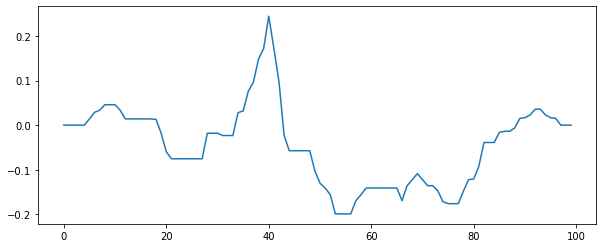

In [ ]:
plt.figure(figsize = (10,4))
X_train[1000]
plt.plot(X_train[1000])
plt.show()

## DataLoader

In [ ]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        '''
        Args : 
            csvfile : train/val/test csvfiles
            audio_dir : directory that contains folders 0 - f
        '''
        self.X = X
        self.y = y

    # get one segment (==59049 samples) and its 50-d label
    def __getitem__(self, index):

      data_X = self.X[index].to(torch.float32).unsqueeze(0)
      data_y = self.y[index].to(torch.float32)

      return data_X, data_y
        
    
    def __len__(self):
        return len(self.y)

In [ ]:
params = {'batch_size': 24,
          'shuffle': True,
          'num_workers': 4}

kfold = True

if kfold:
  kfold = KFold(n_splits = 5)


else:
  training_set = MyDataset(X_train[:-18],y_train[:-18])
  test_set = MyDataset(X_test,y_test)

  train_loader= torch.utils.data.DataLoader(training_set, **params)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1)


In [ ]:
class SampleCNN(nn.Module):
    def __init__(self):
        super(SampleCNN, self).__init__()

        #self.to_linear = None

        # 59049 x 1
        self.conv1 = nn.Sequential(
            nn.Conv1d(1, 128, kernel_size=3, stride=3, padding=0),
            nn.BatchNorm1d(128),
            nn.ReLU())
        # 19683 x 128
        self.conv2 = nn.Sequential(
            nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(3, stride=3))
        # 6561 x 128
        # self.conv3 = nn.Sequential(
        #     nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(256),
        #     nn.ReLU(),
        #     nn.MaxPool1d(3,stride=3))
        # # 2187 x 128
        # self.conv4 = nn.Sequential(
        #     nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(256),
        #     nn.ReLU(),
        #     nn.MaxPool1d(3,stride=3))
        # # 729 x 256
        # self.conv5 = nn.Sequential(
        #     nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(256),
        #     nn.ReLU(),
        #     nn.MaxPool1d(3,stride=3))
        # # 243 x 256
        # self.conv6 = nn.Sequential(
        #     nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(256),
        #     nn.ReLU(),
        #     nn.MaxPool1d(3,stride=3),
        #     nn.Dropout(0.5))
        # 81 x 256
        # self.conv7 = nn.Sequential(
        #     nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(256),
        #     nn.ReLU(),
        #     nn.MaxPool1d(3,stride=3))
        # # 27 x 256
        # self.conv8 = nn.Sequential(
        #     nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(256),
        #     nn.ReLU(),
        #     nn.MaxPool1d(3,stride=3))
        # # 9 x 256
        # self.conv9 = nn.Sequential(
        #     nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(256),
        #     nn.ReLU(),
        #     nn.MaxPool1d(3,stride=3))
        # # 3 x 256
        # self.conv10 = nn.Sequential(
        #     nn.Conv1d(256, 512, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(512),
        #     nn.ReLU(),
        #     nn.MaxPool1d(3,stride=3))
        # # 1 x 512 
        # self.conv11 = nn.Sequential(
        #     nn.Conv1d(512, 512, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm1d(512),
        #     nn.ReLU(),
        #     nn.Dropout(0.5))
        # 1 x 512 
        self.linear_1 = nn.Linear(128*4, 128)
        self.linear_2 = nn.Linear(128, 1)
        #self.activation = nn.Sigmoid()
    
    def forward(self, x):
        # input x : 23 x 59049 x 1
        # expected conv1d input : minibatch_size x num_channel x width

        #x = x.view(x.shape[0], 1,-1)
        # x : 23 x 1 x 59049

        out = self.conv1(x)
        #print(out.size())
        out = self.conv2(out)
        #print(out.size())
        #out = self.conv3(out)
        #print(out.size())
        # out = self.conv4(out)
        # out = self.conv5(out)
        # out = self.conv6(out)
        # out = self.conv7(out)
        # out = self.conv8(out)
        # out = self.conv9(out)
        # out = self.conv10(out)
        # out = self.conv11(out) 
        
        out = out.view(x.shape[0], out.size(1) * out.size(2))
        out = self.linear_1(out)
        out = self.linear_2(out)

        #logit = self.activation(logit)

        return out

## Train

In [ ]:
#@title Train Normal
def train(train_loader, test_loader, lr, epochs, pretrained_weights = None):
  device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

  net = SampleCNN().to(device)
  liveloss = PlotLosses()

  MSE_loss = torch.nn.MSELoss()
  optim = torch.optim.Adam(net.parameters(), lr = lr)

  if pretrained_weights:
    net.load_state_dict(torch.load(pretrained_weights))

  for epoch in range(1 , epochs+1):

      if epoch > 0 and epoch % 10 == 0:

        liveloss.update(logs)
        liveloss.send()

      net.train()
      training_loss = 0.
      validation_loss = 0.
      logs = {}

      for batch_idx, (X_batch, y_batch) in enumerate(tqdm(train_loader)):
          # Transfer to GPU
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)
          #print(X_batch.size())
          net.zero_grad()
          output = net(X_batch)
          #print(output.size(), y_batch.size())
          loss = MSE_loss(y_batch, output)

          #print(output[0].item(), y_batch[0].item()) 

          loss.backward()
          optim.step()

          training_loss += loss
      print("Training loss for epoch %d is %.4f " %(epoch, training_loss))

      if epoch % 500 == 0:
        print("Saving model weights...")
        weight_path = '/gdrive/MyDrive/code/Heart Rate Detection/cnn_weights/' + 'cm(full)_epoch_' + str(epoch) + '.pt'
        torch.save(net.state_dict(), weight_path)


      #Validation
      net.eval()
      y_true = []
      y_pred = []
      for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        out = net(X_batch)
        loss = MSE_loss(out, y_batch)
        validation_loss += loss

        y_true.append(int(y_batch.item()))
        y_pred.append(int(out.item()))

      print("Validation loss for epoch %d is %.4f " %(epoch, validation_loss))

      print("Actual Heartrate:    ", y_true[:20])
      print("Predicted Heartrate: ", y_pred[:20])

      logs['training_loss'] = training_loss
      logs['validation_loss'] = validation_loss

    # liveloss.update(logs)
    # livesloss.send()

      

    # liveloss.update(logs)

    # liveloss.update(logs)
    # liveloss.send()

        



    # # Validation
    # with torch.set_grad_enabled(False):
    #     for local_batch, local_labels in validation_generator:
    #         # Transfer to GPU
    #         local_batch, local_labels = local_batch.to(device), local_labels.to(device)

In [ ]:
#@title Train Kfold
def train_kfold(X_train, y_train, lr, epochs, batch_size = 24, pretrained_weights = None):
  device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

  net = SampleCNN().to(device)
  liveloss = PlotLosses()

  MSE_loss = torch.nn.MSELoss()
  optim = torch.optim.Adam(net.parameters(), lr = lr)

  if pretrained_weights:
    net.load_state_dict(torch.load(pretrained_weights))

  kfold = KFold(n_splits=5)

  for fold, (train_index, test_index) in enumerate(kfold.split(X_train, y_train)):
      print("Training Fold: ", fold+1)
      ### Dividing data into folds
      x_train_fold = X_train[train_index]
      x_test_fold = X_train[test_index]
      y_train_fold = y_train[train_index]
      y_test_fold = y_train[test_index]

      #print(x_train_fold.size, x_test_fold.size, y_train_fold.size, y_test_fold.size)

      train = MyDataset(x_train_fold, y_train_fold)
      test = MyDataset(x_test_fold, y_test_fold)

      train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
      test_loader = torch.utils.data.DataLoader(test, batch_size = 1, shuffle = False)

      for epoch in range(1 , epochs+1):

          if epoch > 0 and epoch % 10 == 0:

            liveloss.update(logs)
            liveloss.send()

          net.train()
          training_loss = 0.
          validation_loss = 0.
          logs = {}

          for batch_idx, (X_batch, y_batch) in enumerate(tqdm(train_loader)):
              # Transfer to GPU
              X_batch, y_batch = X_batch.to(device), y_batch.to(device)
              #print(X_batch.size())
              net.zero_grad()
              output = net(X_batch)
              #print(output.size(), y_batch.size())
              loss = MSE_loss(y_batch, output)

              #print(output[0].item(), y_batch[0].item()) 

              loss.backward()
              optim.step()

              training_loss += loss
          print("(Fold: %d) Training loss for epoch %d is %.4f " %(fold+1, epoch, training_loss))

          if epoch % 500 == 0:
            print("Saving model weights...")
            weight_path = '/gdrive/MyDrive/code/Heart Rate Detection/cnn_weights/' + 'cm(kfold)_epoch_' + str(epoch) + '.pt'
            torch.save(net.state_dict(), weight_path)


          #Validation
          net.eval()
          y_true = []
          y_pred = []
          for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            out = net(X_batch)
            loss = MSE_loss(out, y_batch)
            validation_loss += loss

            #print(y_batch)

            y_true.append(int(y_batch.item()))
            y_pred.append(int(out.item()))

          print("(Fold %d) Validation loss for epoch %d is %.4f " %(fold+1, epoch, validation_loss))

          print("Actual Heartrate:    ", y_true[:20])
          print("Predicted Heartrate: ", y_pred[:20])

          # r2 = r2_score(y_true, y_pred)
          # print("(Fold %d) R2 Score: %.2f: " %(fold+1, r2))

          logs['training_loss'] = training_loss
          logs['validation_loss'] = validation_loss

    # liveloss.update(logs)
    # livesloss.send()

      

    # liveloss.update(logs)

    # liveloss.update(logs)
    # liveloss.send()

        



    # # Validation
    # with torch.set_grad_enabled(False):
    #     for local_batch, local_labels in validation_generator:
    #         # Transfer to GPU
    #         local_batch, local_labels = local_batch.to(device), local_labels.to(device)

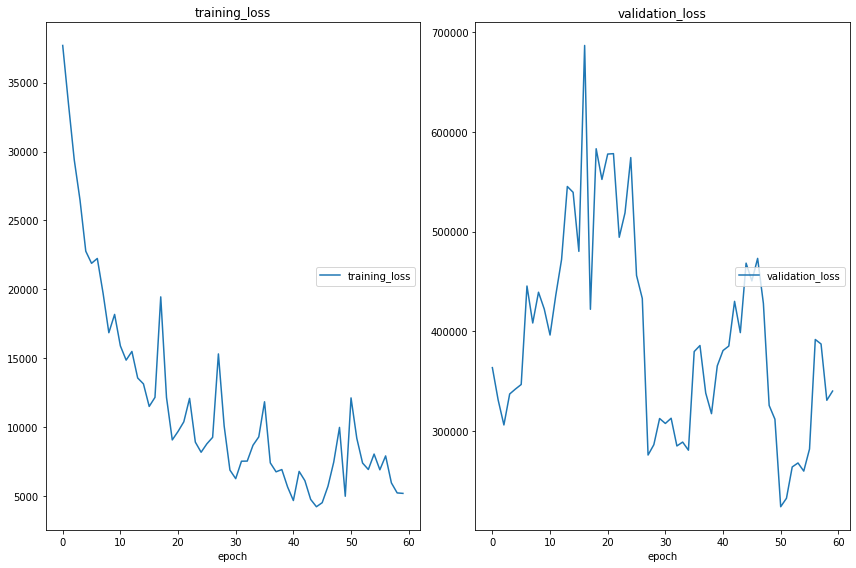

training_loss
	training_loss    	 (min: 4227.229, max: 37698.098, cur: 5196.532)
validation_loss
	validation_loss  	 (min: 224466.453, max: 686352.562, cur: 340293.906)



(Fold: 2) Training loss for epoch 100 is 5104.0640 
(Fold 2) Validation loss for epoch 100 is 330757.8125 
Actual Heartrate:     [90, 75, 72, 80, 90, 85, 80, 90, 80, 90, 80, 100, 93, 98, 72, 72, 73, 84, 53, 98]
Predicted Heartrate:  [100, 102, 73, 61, 71, 76, 71, 76, 63, 68, 73, 80, 72, 81, 65, 82, 67, 70, 78, 97]
(Fold 2) R2 Score: -0.39: 



(Fold: 2) Training loss for epoch 101 is 4849.9829 
(Fold 2) Validation loss for epoch 101 is 301137.8125 
Actual Heartrate:     [90, 75, 72, 80, 90, 85, 80, 90, 80, 90, 80, 100, 93, 98, 72, 72, 73, 84, 53, 98]
Predicted Heartrate:  [102, 98, 75, 66, 72, 78, 71, 79, 67, 71, 76, 80, 73, 84, 61, 83, 68, 71, 78, 92]
(Fold 2) R2 Score: -0.26: 



(Fold: 2) Training loss for epoch 102 is 4670.6631 
(Fold 2) Validation loss for epoch 102 is 342333.6250 
Actual Heartrate:     [90, 75, 72, 80, 90, 85, 80, 90, 80, 90, 80, 100, 93, 98, 72, 72, 73, 84, 53, 98]
Predicted Heartrate:  [102, 101, 71, 64, 70, 77, 68, 77, 66, 68, 74, 80, 70, 83, 57, 82, 66, 70, 77, 89]
(Fold 2) R2 Score: -0.44: 



(Fold: 2) Training loss for epoch 103 is 5260.5195 
(Fold 2) Validation loss for epoch 103 is 312815.7812 
Actual Heartrate:     [90, 75, 72, 80, 90, 85, 80, 90, 80, 90, 80, 100, 93, 98, 72, 72, 73, 84, 53, 98]
Predicted Heartrate:  [95, 97, 74, 61, 72, 79, 72, 79, 65, 72, 77, 81, 73, 83, 62, 83, 68, 70, 78, 95]
(Fold 2) R2 Score: -0.31: 



(Fold: 2) Training loss for epoch 104 is 5524.4780 
(Fold 2) Validation loss for epoch 104 is 396460.9375 
Actual Heartrate:     [90, 75, 72, 80, 90, 85, 80, 90, 80, 90, 80, 100, 93, 98, 72, 72, 73, 84, 53, 98]
Predicted Heartrate:  [91, 98, 72, 64, 70, 75, 68, 75, 64, 69, 74, 78, 70, 82, 40, 80, 65, 69, 73, 82]
(Fold 2) R2 Score: -0.67: 



(Fold: 2) Training loss for epoch 105 is 6276.2715 
(Fold 2) Validation loss for epoch 105 is 397661.5938 
Actual Heartrate:     [90, 75, 72, 80, 90, 85, 80, 90, 80, 90, 80, 100, 93, 98, 72, 72, 73, 84, 53, 98]
Predicted Heartrate:  [94, 94, 73, 53, 71, 77, 70, 76, 62, 69, 73, 79, 70, 79, 65, 81, 65, 66, 75, 97]
(Fold 2) R2 Score: -0.67: 



(Fold: 2) Training loss for epoch 106 is 5943.9106 
(Fold 2) Validation loss for epoch 106 is 449241.1250 
Actual Heartrate:     [90, 75, 72, 80, 90, 85, 80, 90, 80, 90, 80, 100, 93, 98, 72, 72, 73, 84, 53, 98]
Predicted Heartrate:  [96, 93, 70, 59, 69, 75, 67, 75, 62, 67, 71, 78, 68, 79, 54, 80, 62, 67, 71, 84]
(Fold 2) R2 Score: -0.89: 



(Fold: 2) Training loss for epoch 107 is 5813.8120 
(Fold 2) Validation loss for epoch 107 is 393093.7188 
Actual Heartrate:     [90, 75, 72, 80, 90, 85, 80, 90, 80, 90, 80, 100, 93, 98, 72, 72, 73, 84, 53, 98]
Predicted Heartrate:  [97, 98, 73, 57, 69, 78, 70, 77, 61, 69, 72, 79, 70, 80, 65, 81, 65, 66, 74, 96]
(Fold 2) R2 Score: -0.65: 



(Fold: 2) Training loss for epoch 108 is 6539.2100 


KeyboardInterrupt: ignored

In [ ]:
train_kfold(X_train = X_train, y_train = y_train, lr = 0.001, epochs = 500, batch_size = 24, pretrained_weights = None)

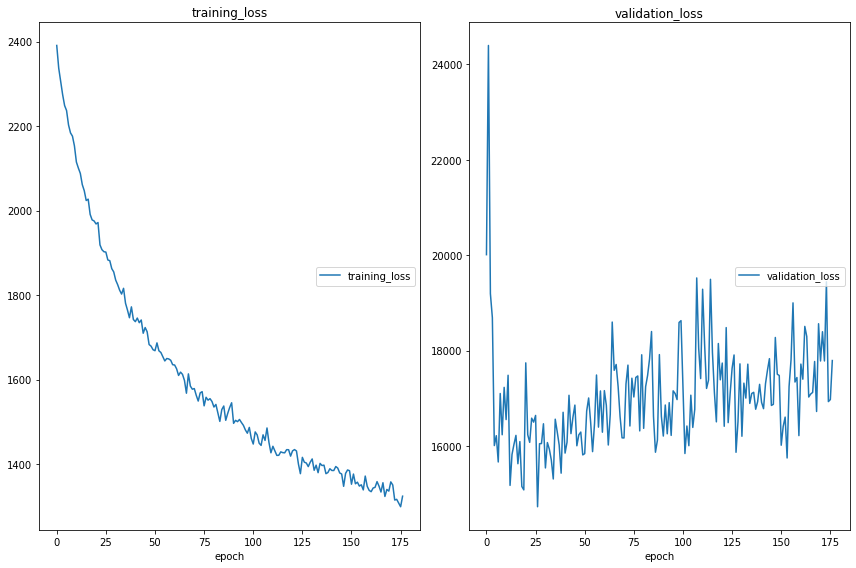

training_loss
	training_loss    	 (min: 1299.454, max: 2390.726, cur: 1324.393)
validation_loss
	validation_loss  	 (min: 14725.127, max: 24398.117, cur: 17790.859)



Training loss for epoch 1770 is 1336.7422 


RuntimeError: ignored

In [ ]:
train(train_loader = train_loader, test_loader = test_loader, lr = 0.0001, epochs = 5000)

## Inference

In [ ]:
data_type = 'fft_data'
data_dir = os.path.join('/gdrive/MyDrive/stable videos/ISI/df/normal_light/with_color_mag/', data_type)
time_interval = 10
#print(os.listdir(data_dir))

# X_inf = None
# y_inf = None

subjects = ['sub_24_fft_data.pkl','sub_37_fft_data.pkl','sub_41_fft_data.pkl','sub_32_fft_data.pkl','sub_62_fft_data.pkl',
            'sub_45_fft_data.pkl','sub_16_fft_data.pkl','sub_60_fft_data.pkl','sub_28_fft_data.pkl','sub_55_fft_data.pkl']

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

net = SampleCNN().to(device)
weight_path = '/gdrive/MyDrive/code/Heart Rate Detection/cnn_weights/cm_epoch_500.pt'
net.load_state_dict(torch.load(weight_path))

gt = []
pred = []
pred_win = []


for subject in subjects:
  path = os.path.join(data_dir, subject)
  df = pd.read_pickle(path)
  idx = [i for i in range(0,df.shape[0],time_interval)]

  data = df.iloc[idx, :].fillna(0)
  data = data.to_numpy()

  X_inf = np.zeros((data.shape[0], 36))


  X_inf[:, :data.shape[1]] = data
  y_inf = data[:, -1].reshape(-1,1)
  # print(X_inf.shape, y_inf.shape)



  X_inf = torch.tensor(X_inf)
  y_inf = torch.tensor(y_inf)

  inf_data = MyDataset(X_inf, y_inf)
  inf_loader = torch.utils.data.DataLoader(inf_data, batch_size = 1)

  with torch.no_grad():
    y_true = []
    y_pred = []
    for X_batch, y_batch in inf_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      #print(X_batch.size())

      out = net(X_batch)

      y_true.append(int(y_batch.item()))
      y_pred.append(int(out.item()))


  #print(idx)

  win_size = 10

  idx = [i for i in range(0, len(y_pred)-10, 5)][1:]
  weights = [j for j in range(win_size)]

  y_pred_win = [sum(y_pred[t : t + win_size]) // win_size for t in idx]

  #y_pred_weighted = [round(np.average(y_pred[t - win_size : t], weights = weights), 0) for t in idx] 

  y_pred_final = int(sum(y_pred)) // len(y_pred)

  # print(y_pred)
  # print(y_pred_win)
  #print(y_pred_weighted)
  # print(y_pred_final)

  gt.append(y_true[0])
  print("Actual Heartrate: %d" %(y_true[0]))
  pred.append(y_pred_final)
  print("Predicted Heartrate(mean): %d" %(y_pred_final))
  # pred_win.append(y_pred_win[-1])
  # print("Predicted Heartrate(win): %d" %(y_pred_win[-1]))


print("RMSE: ", math.sqrt(mean_squared_error(gt, pred)))
print("Pearson correlation: ", pearsonr(gt, pred))

# print("RMSE(win): ", math.sqrt(mean_squared_error(gt, pred_win)))
# print("Pearson correlation(win): ", pearsonr(gt, pred_win))




Actual Heartrate: 87
Predicted Heartrate(mean): 81
Actual Heartrate: 90
Predicted Heartrate(mean): 89
Actual Heartrate: 95
Predicted Heartrate(mean): 84
Actual Heartrate: 77
Predicted Heartrate(mean): 79
Actual Heartrate: 100
Predicted Heartrate(mean): 90
Actual Heartrate: 93
Predicted Heartrate(mean): 86


ValueError: ignored

In [ ]:
# gt = [70,65] 
# pred = [77, 68]

# print("RMSE: ", math.sqrt(mean_squared_error(gt, pred)))
# print("Pearson correlation: ", pearsonr(gt, pred))



RMSE:  5.385164807134504
Pearson correlation:  (1.0, 1.0)
